In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("car data.csv")

In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [7]:
data.shape

(301, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
data.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
data.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [14]:
import datetime
date_time = datetime.datetime.now()


In [15]:
data['Age']=date_time.year-data['Year']

In [16]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [17]:
data.drop('Year',axis=1,inplace=True)

<AxesSubplot:xlabel='Selling_Price'>

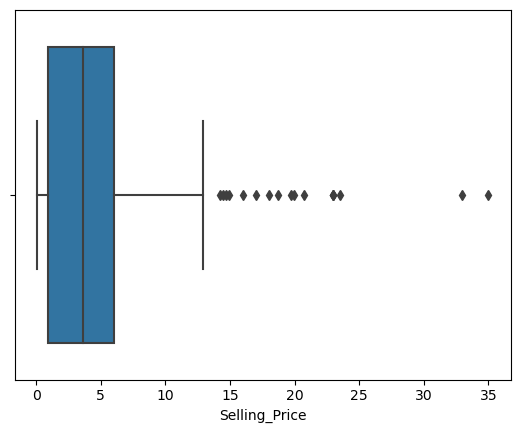

In [18]:
import seaborn as sns
sns.boxplot(data['Selling_Price'])

In [19]:
sorted(data['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [20]:
data=data[~(data['Selling_Price']>=33.0) & (data['Selling_Price']<=35.0)]

In [21]:
data.shape

(299, 9)

In [22]:
data.head(1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9


In [23]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [24]:
data['Fuel_Type']=data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [25]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [26]:
data['Seller_Type']=data['Seller_Type'].map({'Dealer':0,'Individual':1})

In [27]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [28]:
data['Transmission']=data['Transmission'].map({'Manual':0,'Automatic':1})

In [29]:
x = data.drop(['Car_Name','Selling_Price'],axis=1)
y = data['Selling_Price']

In [30]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test =   train_test_split(x,y,test_size=0.1,random_state=2)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,9
1,sx4,4.75,9.54,43000,1,0,0,0,10
2,ciaz,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2.85,4.15,5200,0,0,0,0,12
4,swift,4.60,6.87,42450,1,0,0,0,9


In [35]:
lr=LinearRegression()

In [36]:
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
prediction = lr.predict(x_train)


In [38]:
error_score = metrics.r2_score(y_train,prediction)
print("R squared error:",error_score)

R squared error: 0.8778573217041332


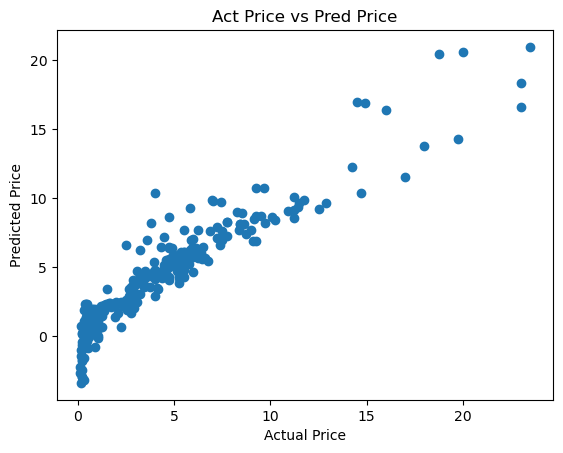

In [39]:
plt.scatter(y_train,prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Act Price vs Pred Price")
plt.show()

In [40]:
testing_data_pred = lr.predict(x_test)

In [41]:
error_score  = metrics.r2_score(y_test,testing_data_pred)

In [42]:
print("R squared error:",error_score)

R squared error: 0.876211705941689


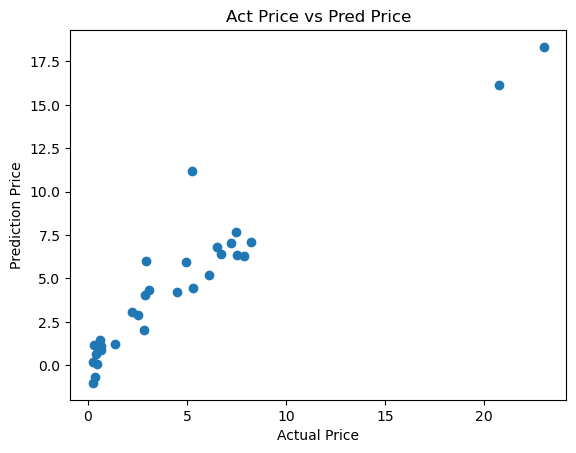

In [43]:
plt.scatter(y_test,testing_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Act Price vs Pred Price")
plt.show()

In [44]:
lasso = Lasso()

In [45]:
lasso_final = lasso.fit(x_train,y_train)

In [46]:
training_pred = lasso.predict(x_train)

In [47]:
error_score = metrics.r2_score(y_train,training_pred)

In [48]:
print("R squared error:",error_score)

R squared error: 0.8520163356481156


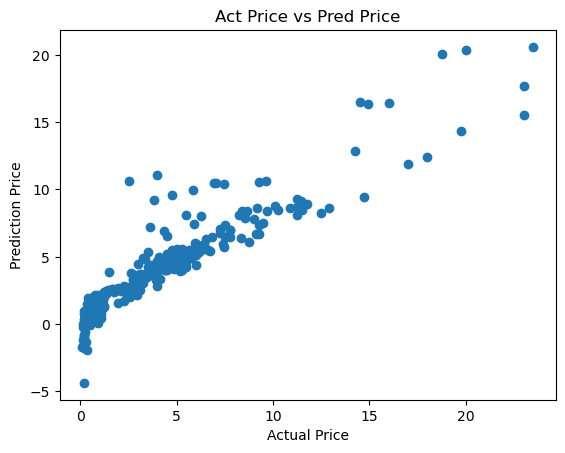

In [49]:
plt.scatter(y_train,training_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Act Price vs Pred Price")
plt.show()


In [50]:
testing_pred = lasso.predict(x_test)

In [51]:
error_score = metrics.r2_score(y_test,testing_pred)

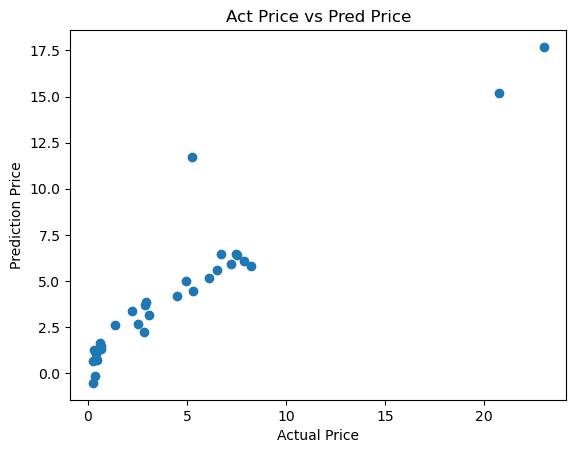

In [52]:
plt.scatter(y_test,testing_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Act Price vs Pred Price")
plt.show()

In [53]:
input_data = (2014,4.6,42450,1,0,0,0)

input_data_asnp = np.asarray(input_data)

reshapeddata = input_data_asnp.reshape(1,-1)



In [54]:
prediction = lr.predict(reshapeddata)
print("The price of car is:",prediction)

The price of car is: [51839.04578723]
